In [293]:
######dataset from https://www.kaggle.com/code/lakhankumawat/drugs-classification-notebook-for-beginners/data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings 
import missingno
import hvplot.pandas
import plotly.graph_objs as go
import plotly.offline as py
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap



ModuleNotFoundError: No module named 'plotnine'

In [294]:
pip install plotnine

  Using cached plotnine-0.9.0-py3-none-any.whl (1.2 MB)



  Using cached mizani-0.7.4-py3-none-any.whl (63 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\packaging-21.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [208]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261260 sha256=61ff1c0b59db4a9fa93f5577af5433bc6ffce8005b17c9097e492a056bd29e6c
  Stored in directory: C:\Users\BJ\AppData\Local\Temp\pip-ephem-wheel-cache-jny51777\wheels\43\c8\f4\c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ade9d0a800a5c6c8e701cf204f66d14389aa95ce62d902baf3ee55e1a8d6ee4b
  Stored in directory: c:\users\bj\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=b8dc63f620d447c38904e90ff363f70ef2dc51a778ab148316d5b47aceab177c
  Stored in directory: c:\users\bj\appdata\local\pip\cache\wheels\51\f9\a5\740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built pandas-profiling htmlmin imagehash


In [2]:
import plotly.express as px


In [3]:
!pip install -q hvplot


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score,classification_report

# Reading the data

In [5]:

dataset = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

# Exploratory Data Anaysis

In [6]:
"-----------Head------------"

dataset.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [320]:
"------------------tail-----------"

dataset.tail()

age  sex  chest pain type  resting bp s  cholesterol  \
1185 -0.932213    1                0     -1.206560     0.529071   
1186  1.526558    1                3      0.645180    -0.171279   
1187  0.350624    1                3     -0.117301    -0.782852   
1188  0.350624    0                1     -0.117301     0.252877   
1189 -1.680534    1                2      0.318402    -0.348832   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1185                    0            0       -0.303164                0   
1186                    1            0        0.049682                0   
1187                    0            0       -0.969650                1   
1188                    0            2        1.343449                0   
1189                    0            0        1.304244                0   

       oldpeak  ST slope  target  
1185  0.255301         2       1  
1186  2.281307         2       1  
1187  0.255301         2       1  
1188 -0.849792         2       1  
1189 -0.849792         1       0

In [277]:
"-----------Info---------------"

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  944 non-null    float64
 1   sex                  944 non-null    int64  
 2   chest pain type      944 non-null    int64  
 3   resting bp s         944 non-null    float64
 4   cholesterol          944 non-null    float64
 5   fasting blood sugar  944 non-null    int64  
 6   resting ecg          944 non-null    int64  
 7   max heart rate       944 non-null    float64
 8   exercise angina      944 non-null    int64  
 9   oldpeak              944 non-null    float64
 10  ST slope             944 non-null    int64  
 11  target               944 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 128.2 KB


In [278]:
"---------Data types-----------"

dataset.dtypes

age                    float64
sex                      int64
chest pain type          int64
resting bp s           float64
cholesterol            float64
fasting blood sugar      int64
resting ecg              int64
max heart rate         float64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [279]:
print(f'The Data-Set Contain {dataset.shape[0]} Rows and {dataset.shape[1]} Columns')


The Data-Set Contain 944 Rows and 12 Columns


In [281]:
cat_cols = ['sex','cp','fbs','restecg','slp','thall']
con_cols = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
The target variable is :   ['output']


In [363]:
dataset[cat_cols].head()

KeyError: "['cp', 'fbs', 'restecg', 'slp', 'thall'] not in index"

In [282]:
"------------describe-----------------"

dataset[con_cols].describe().transpose()

count      mean       std       min       25%       50%  \
age             944.0 -0.072345  1.010779 -2.749564 -0.825310  0.029915   
resting bp s    944.0 -0.071896  0.840140 -2.186894 -0.661931 -0.117301   
cholesterol     944.0  0.297579  0.458665 -0.960406 -0.023317  0.262741   
max heart rate  944.0  0.132162  0.959589 -2.694672 -0.577599  0.167297   
oldpeak         944.0 -0.059213  0.893819 -0.941884 -0.849792 -0.389337   

                     75%       max  
age             0.671333  2.488685  
resting bp s    0.427328  2.061217  
cholesterol     0.607984  1.525344  
max heart rate  0.872988  2.441190  
oldpeak         0.531575  2.465489

In [283]:
"--------------------Automated EDA/profiling------------------------------"

profile = ProfileReport(dataset, title="Heart Disease EDA", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Statistical insights


In [7]:
dataset.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})


In [11]:
# dataset = kaggle_dataset.rename(columns={'max heart rate':'thalach' })

# Data cleaning

In [286]:
"----------inconsistent values----------"

##Checking the number of unique values in each column¶

dict = {}
for i in list(dataset.columns):
    dict[i] = dataset[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()


unique count
age                            49
sex                             2
chest pain type                 4
resting bp s                   55
cholesterol                   195
fasting blood sugar             2
resting ecg                     3
max heart rate                105
exercise angina                 2
oldpeak                        36
ST slope                        4
target                          2

In [13]:
"------------missing values------------------------"


# loop through the columns and check the missing values
for col in dataset.columns:
    pct_missing = dataset[col].isnull().sum()##sum() counts all the null values in a column
    print(f'{col} = {pct_missing :.1%}')###show till only 1 place after decimal 
    
    
        

age = 0.0%
sex = 0.0%
chest pain type = 0.0%
resting bp s = 0.0%
cholesterol = 0.0%
fasting blood sugar = 0.0%
resting ecg = 0.0%
max heart rate = 0.0%
exercise angina = 0.0%
oldpeak = 0.0%
ST slope = 0.0%
target = 0.0%


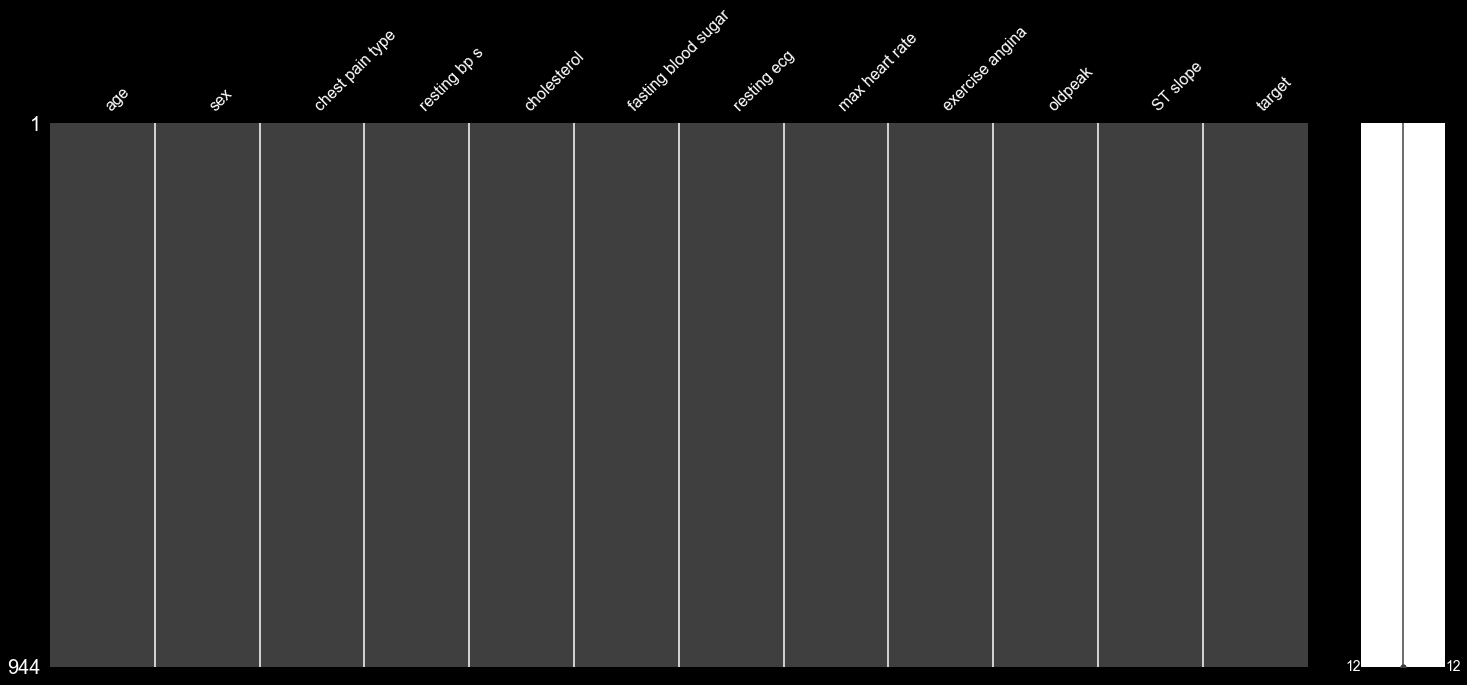

In [252]:

missingno.matrix(dataset, fontsize = 16)
plt.show()

In [321]:
"-------Replace NaN with median-------------"
dataset = dataset.fillna(dataset.median())
dataset.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [329]:
"-----------duplicated values---------------"

duplicated = dataset.duplicated().sum()
if duplicated:
    print('Duplicatd Rows are : {}'.format(duplicated))
else:
    print("There are no duplicate values")

Duplicatd Rows are : 254


In [341]:
# drop the Duplicate value:
duplicated=dataset[dataset.duplicated(keep=False)]
duplicated.head()


age  sex  chest pain type  resting bp s  cholesterol  \
90  -0.504600    0                1     -1.206560    -0.023317   
163 -0.504600    0                1     -1.206560    -0.023317   
556  0.457527    1                2      0.971958     0.085188   
604  0.457527    1                2      0.971958     0.085188   
617  1.740364    1                3     -0.117301     1.101188   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
90                     0            0        0.794578                0   
163                    0            0        0.794578                0   
556                    0            1       -0.852035                1   
604                    0            1       -0.852035                1   
617                    0            2       -1.204880                0   

      oldpeak  ST slope  target  
90  -0.849792         1       0  
163 -0.849792         1       0  
556 -0.849792         2       1  
604 -0.849792         2       1  
617  1.360395         2       1

# univariate analysis

In [304]:
dataset['target'].nunique()


2

In [306]:
dataset['target'].unique()

array([0, 1], dtype=int64)

In [308]:
dataset['target'].value_counts()

0    517
1    427
Name: target, dtype: int64

Percentage Haven't Heart Disease: 57.09%
Percentage Have Heart Disease: 42.91%


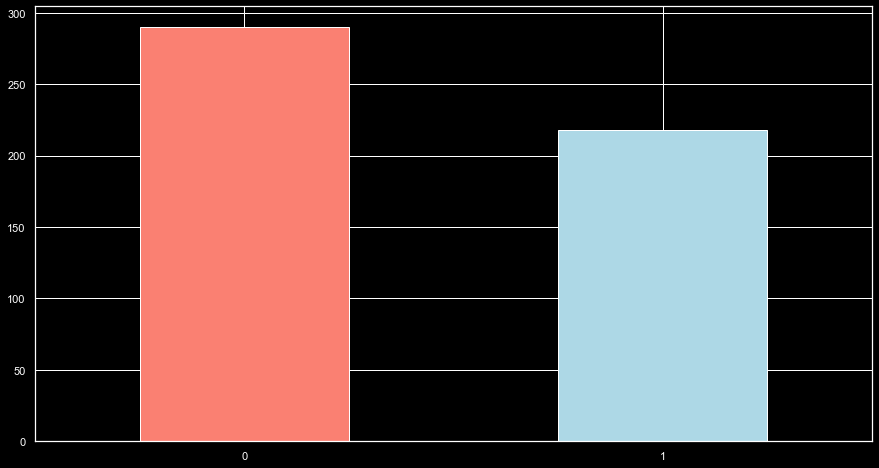

In [346]:
"-------------target count----------------"

dataset["target"].value_counts().plot(kind = "bar", color=["salmon", "lightblue"])
plt.xticks(rotation=0)

target_0 = len(dataset[dataset.target == 0])
target_1 = len(dataset[dataset.target == 1])
print("Percentage Haven't Heart Disease: {:.2f}%".format((target_0 / (len(dataset.target))*100)))
print("Percentage Have Heart Disease: {:.2f}%".format((target_1 / (len(dataset.target))*100)))

# categorical values


In [350]:

dataset.sex.value_counts()

1    354
0    154
Name: sex, dtype: int64

In [349]:
pd.crosstab(dataset.target, dataset.sex)

sex       0    1
target          
0       128  162
1        26  192

In [347]:
dataset.groupby('sex')['target'].value_counts()


sex  target
0    0         128
     1          26
1    1         192
     0         162
Name: target, dtype: int64

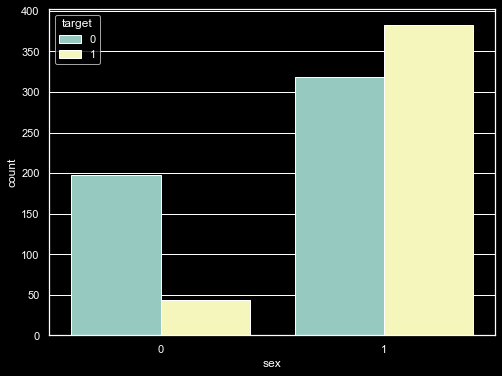

In [311]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=dataset)
plt.show()

# Categorical
# count vs sex, cp, fbs, restecg, exang, slope, ca, thal
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="chest pain type", hue="target", data=df)
plt.show()

# Categorical
# count vs sex, cp, fbs, restecg, exang, slope, ca, thal
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

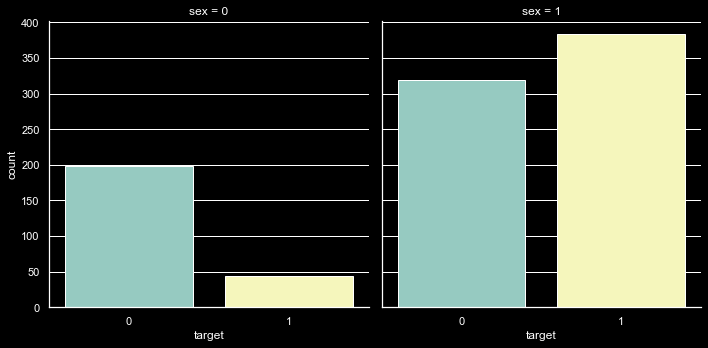

In [313]:
ax = sns.catplot(x="target", col="sex", data=dataset, kind="count", height=5, aspect=1)

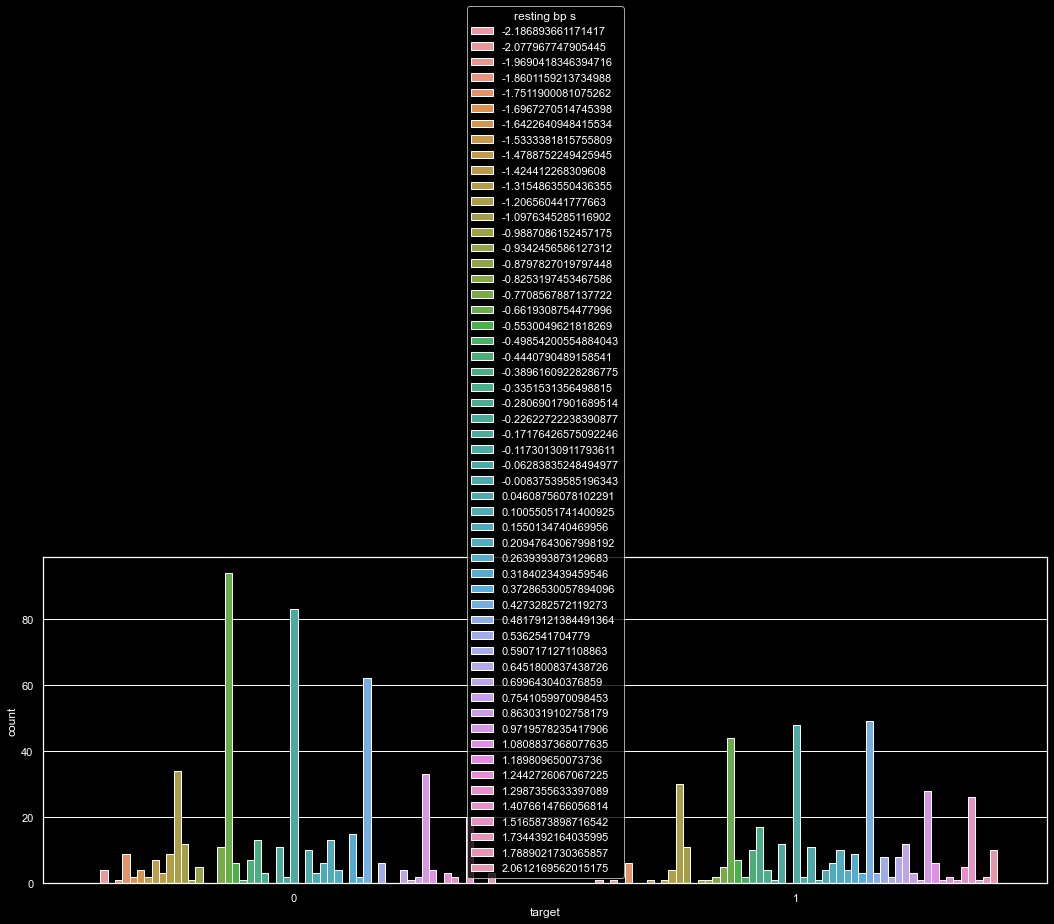

In [315]:
f, ax = plt.subplots(figsize=(18, 6))
ax = sns.countplot(x="target", hue="resting bp s", data=dataset)
plt.show()

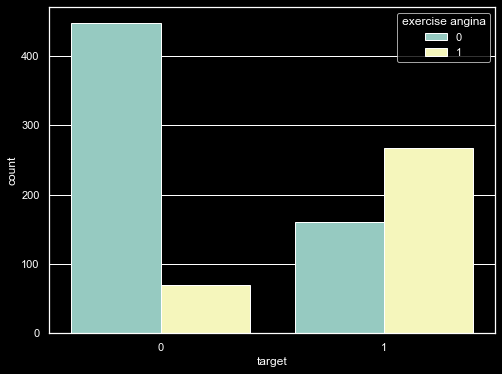

In [317]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exercise angina", data=dataset)
plt.show()

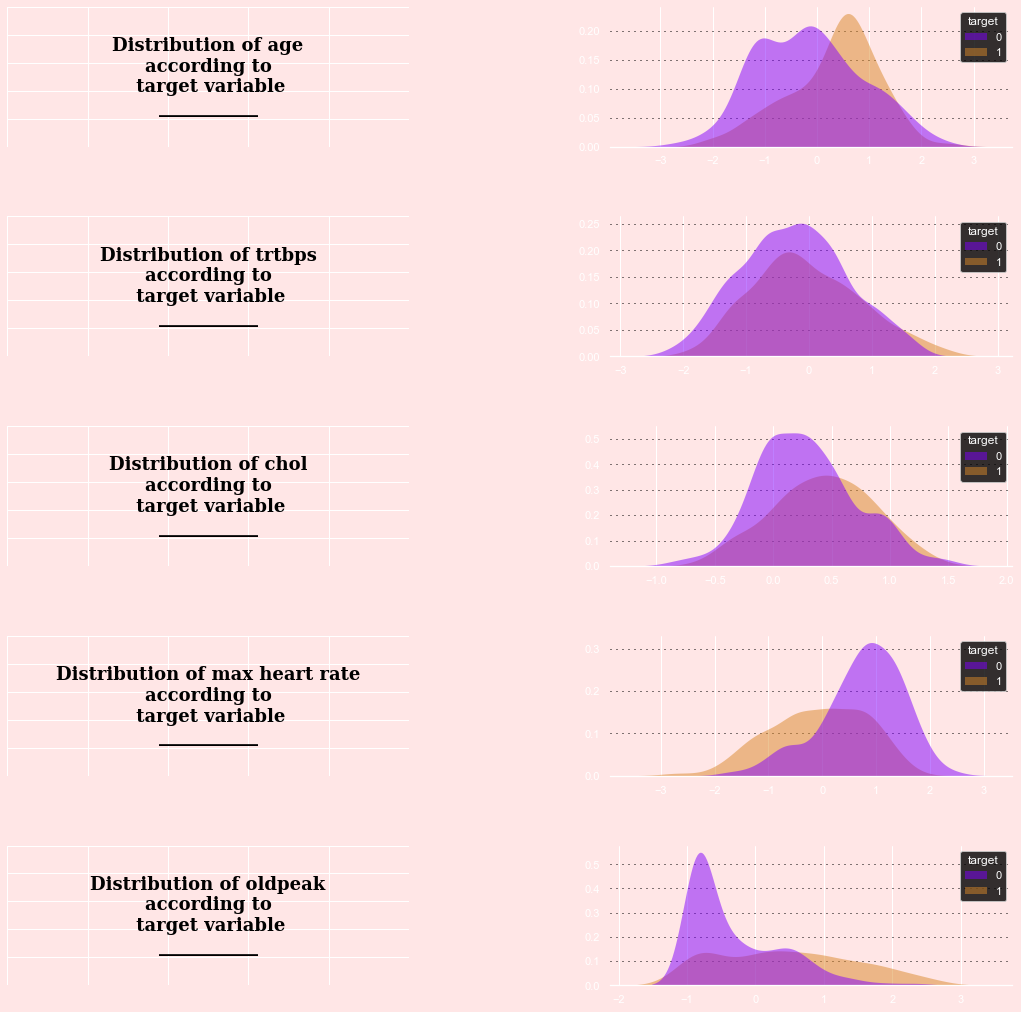

In [361]:
# #####countplot#######
# plt.figure(figsize=(20,10))
# sns.countplot(x=dataset["age"])
# plt.title("COUNT OF PATIENTS AGE",fontsize=20)
# plt.xlabel("AGE",fontsize=20)
# plt.ylabel("COUNT",fontsize=20)
# plt.show()

####displot####
# sns.displot(dataset["resting bp s"])
# plt.title("DISTRIBUTION OF BLOOD PRESSURE AROUND PATIENTS",fontsize=20)
# plt.xlabel("BLOOD PRESSURE",fontsize=20)
# plt.ylabel("COUNT",fontsize=20)
# plt.show()

###displot######
sns.displot(dataset["age"])
plt.title("DISTRIBUTION OF AGE",fontsize=20)
plt.show()

# dataset.set_index('age').plot(kind='bar', stacked=True, figsize=(18,9)) # try df_app_count.plot(kind='bar', stacked=True, figsize=(18,9))
# plt.xlabel("age", fontsize=15)
# plt.ylabel("Count", fontsize=15)
# plt.title("DISTRIBUTION OF AGE")

# age = dataset['age']
# layout = go.Layout(barmode='overlay')
# data = go.Histogram(x=age, opacity=0.6, xbins={'size': 4})
# fig = go.Figure(data=[data], layout=layout)
# py.offline.iplot(fig)


####displot####

# sns.displot(dataset["cholesterol"])
# plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AROUND PATIENTS",fontsize=20)
# plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
# plt.ylabel("COUNT",fontsize=20)
# plt.show()


# sns.displot(dataset["max heart rate"])
# plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=20)
# plt.xlabel("Thalach",fontsize=20)
# plt.ylabel("COUNT",fontsize=20)
# plt.show()

# Bivariate analysis

In [352]:
correlation = dataset.corr()

In [353]:
correlation['target'].sort_values(ascending=False)


target                 1.000000
chest pain type        0.428956
oldpeak                0.414306
exercise angina        0.405324
sex                    0.346876
ST slope               0.325968
age                    0.230668
resting ecg            0.200784
cholesterol            0.161102
resting bp s           0.122739
fasting blood sugar   -0.023531
max heart rate        -0.439611
Name: target, dtype: float64

# Numerical variable

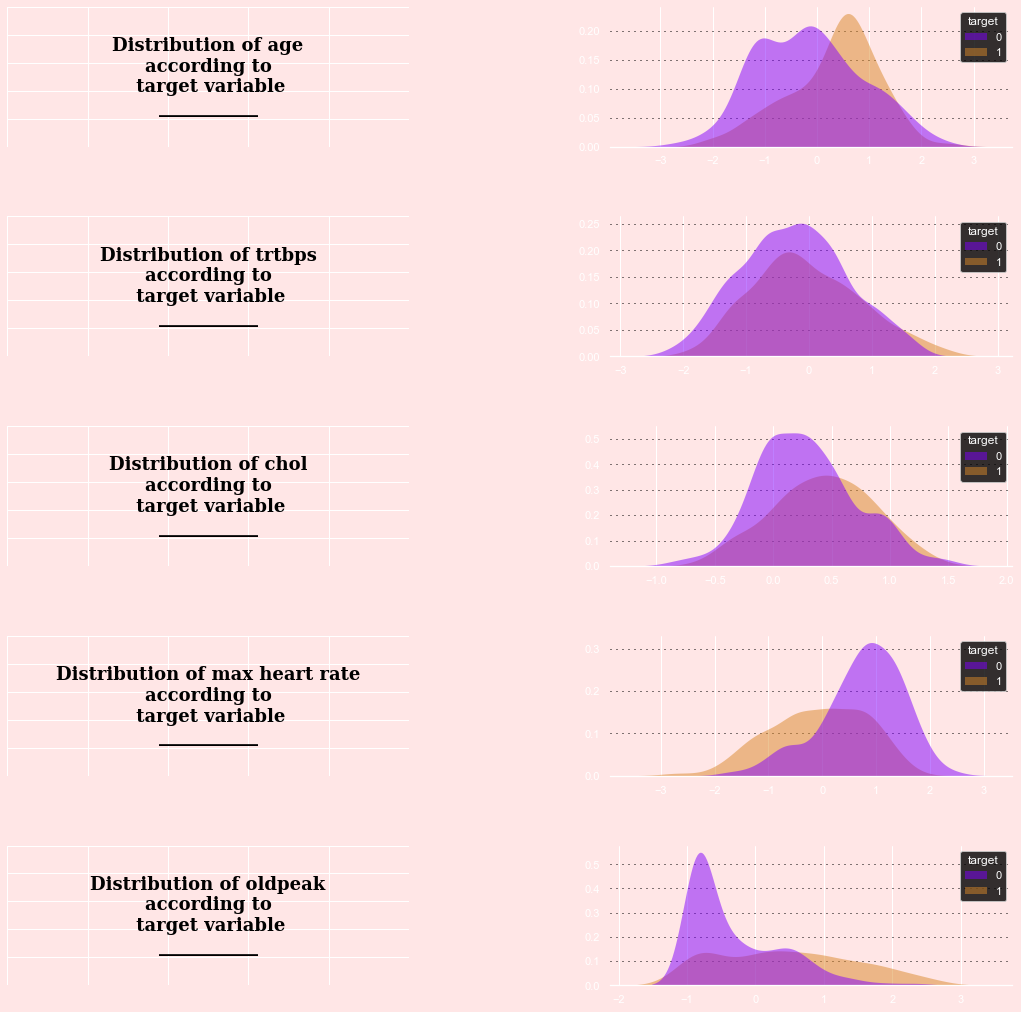

In [362]:

fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=dataset, x='age',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=dataset, x='resting bp s',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=dataset, x='cholesterol',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of max heart rate\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=dataset, x='max heart rate',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=dataset, x='oldpeak',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

In [357]:
dataset['chest pain type'].nunique()

4

In [359]:
dataset['chest pain type'].value_counts()

3    236
2    152
1     84
0     36
Name: chest pain type, dtype: int64

ValueError: x must be 1D

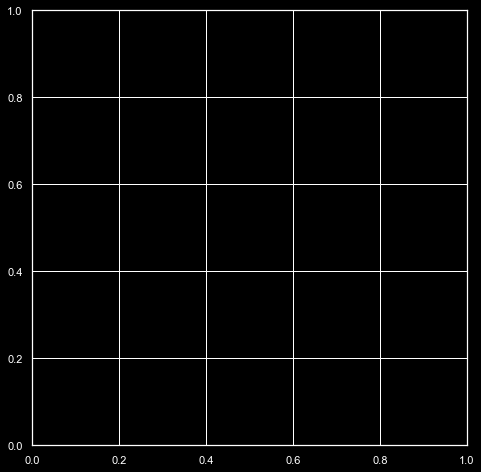

In [272]:
#####pie chart#####
# s=dataset["age"].value_counts().reset_index()
# px.pie(s,names="index",size = values='age',title="%AGE OF MALE AND FEMALE PATIENTS:")
# fig.update_traces(textposition='inside', textinfo='percent+label')

# s=dataset["age"].value_counts().reset_index()
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
# explode = (0.1, 0, 0, 0, 0)  
# plt.pie(s,  explode=explode, colors=colors,
# autopct='%1.1f%%', shadow=True, startangle=140)
# plt.title("Gold medal achievements of five most successful\n"+"countries in 2016 Summer Olympics")
# plt.show()


In [319]:
#####barplot###
# c=dataset["chest pain type"].value_counts().reset_index()
# plt.figure(figsize=(20,10))
# sns.barplot(x=c["index"],y=c["chest pain type"])
# plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
# plt.xlabel("CHEST PAIN TYPE",fontsize=20)
# plt.ylabel("COUNT",fontsize=20)
# plt.show()

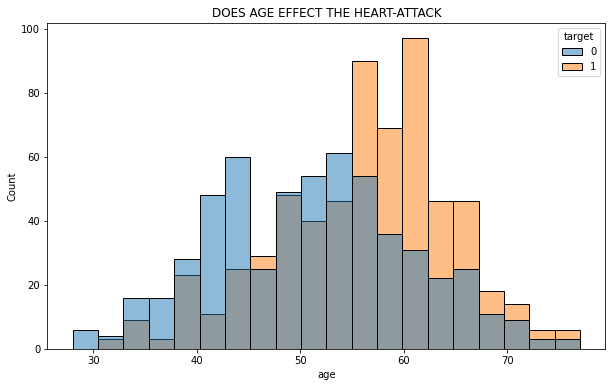

In [26]:
###histplot###
# plt.figure(figsize=(10,6))
# sns.histplot(data = dataset, x = 'age', hue = 'target')
# plt.title("DOES AGE EFFECT THE HEART-ATTACK")
# plt.show()

In [27]:
# v=pd.crosstab(dataset["age"],dataset["target"]).reset_index()

# v.columns=["age","low_risk","high_risk"]

# px.line(v,v["age"],v["high_risk"],title="RISK OF HIGH HEART-ATTACK WITH AGE")

In [28]:
# px.line(v,v["age"],v["low_risk"],title="RISK OF LOW HEART-ATTACK WITH AGE")

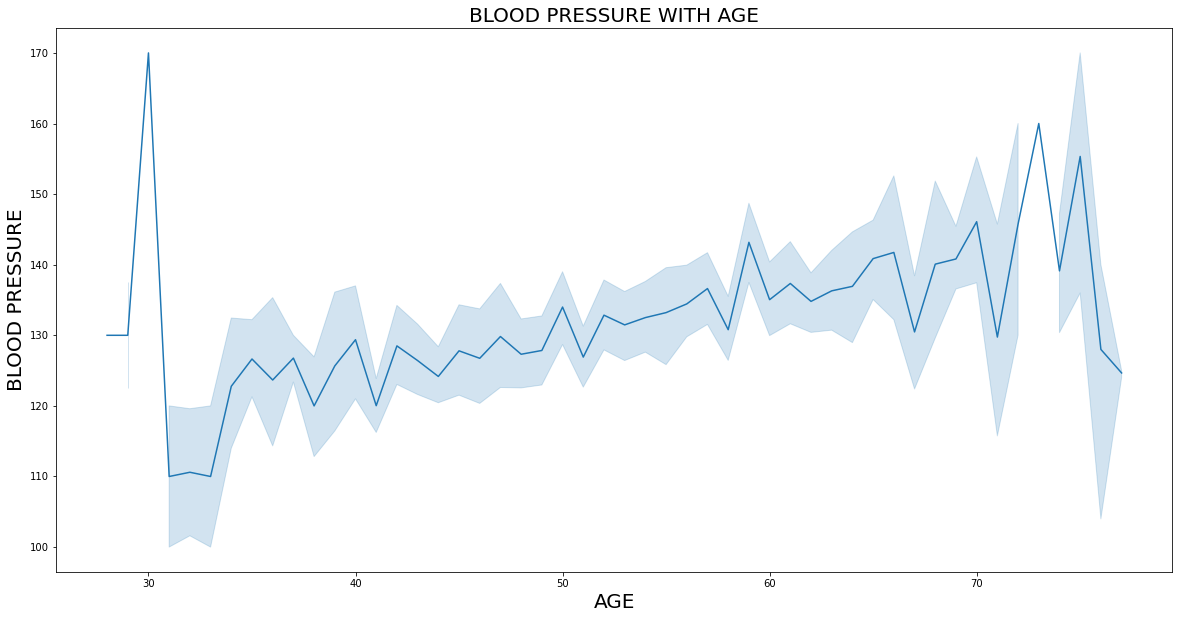

In [29]:
####lineplot
plt.figure(figsize=(20,10))
sns.lineplot(y="resting bp s",x="age",data=dataset)
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

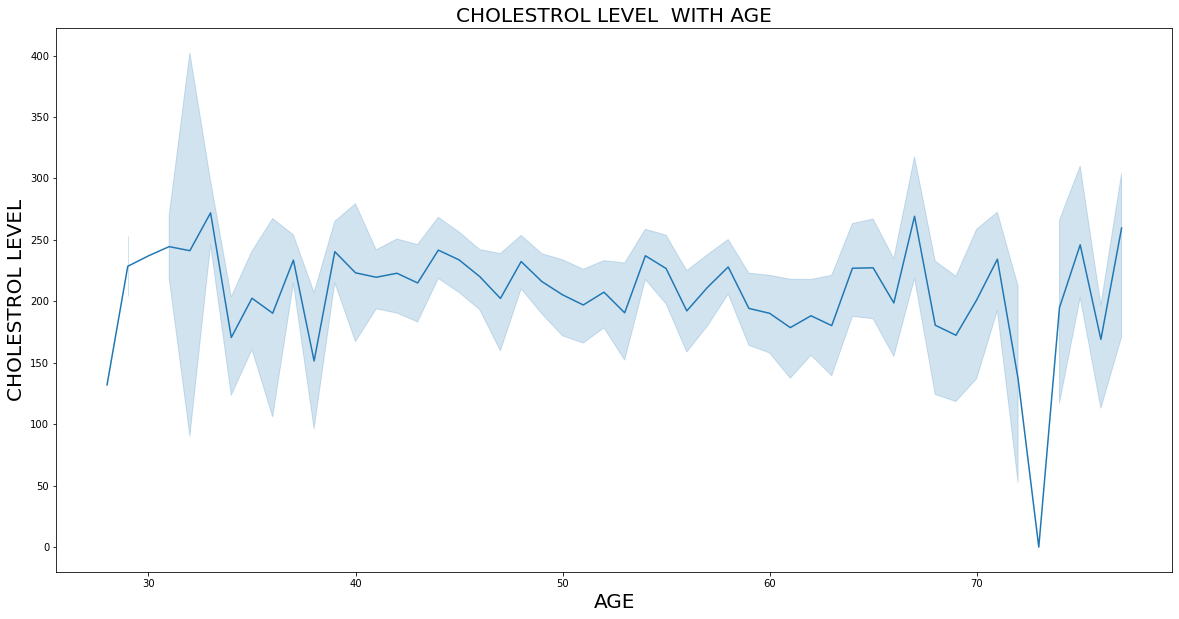

In [30]:
# plt.figure(figsize=(20,10))
# sns.lineplot(y="cholesterol",x="age",data=dataset)
# plt.title("CHOLESTROL LEVEL  WITH AGE",fontsize=20)
# plt.xlabel("AGE",fontsize=20)
# plt.ylabel("CHOLESTROL LEVEL",fontsize=20)
# plt.show()

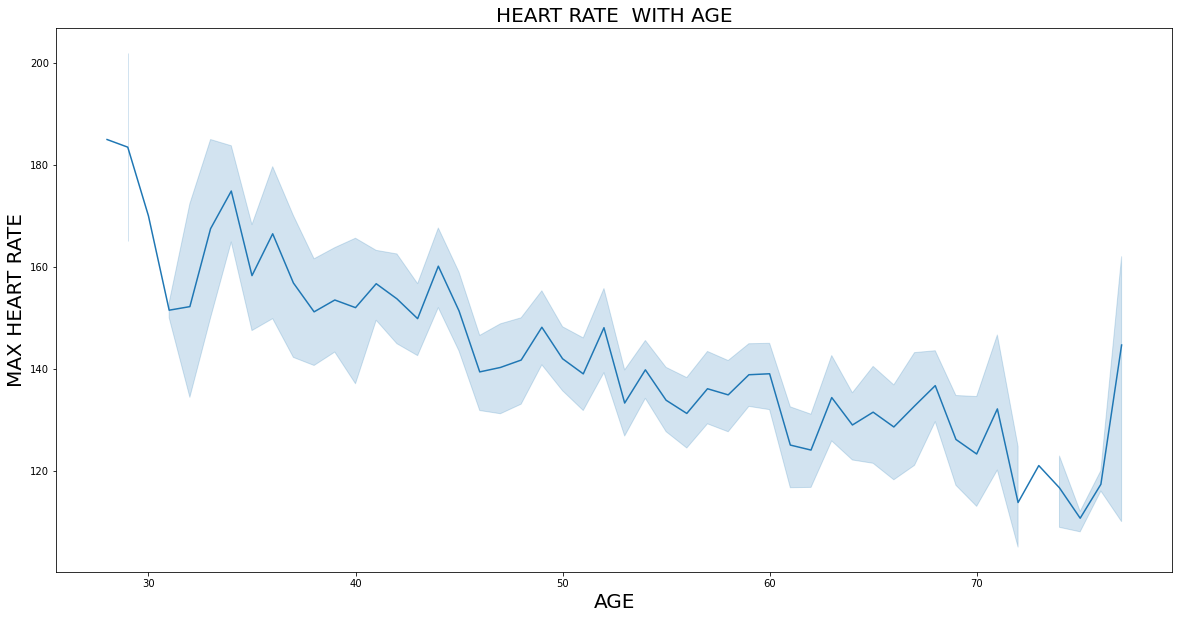

In [31]:
# plt.figure(figsize=(20,10))
# sns.lineplot(y="max heart rate",x="age",data=dataset)
# plt.title("HEART RATE  WITH AGE",fontsize=20)
# plt.xlabel("AGE",fontsize=20)
# plt.ylabel("MAX HEART RATE",fontsize=20)
# plt.show()

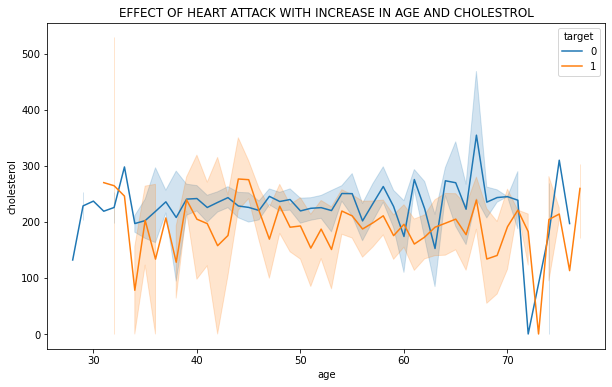

In [32]:
# plt.figure(figsize=(10,6))
# sns.lineplot(x="age",y="cholesterol",hue="target",data=dataset)
# plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTROL")
# plt.show()

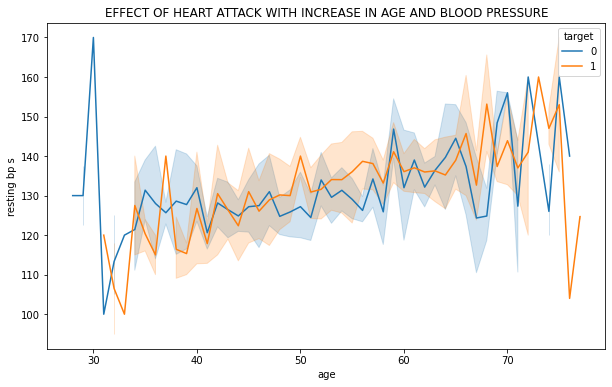

In [33]:
# plt.figure(figsize=(10,6))
# sns.lineplot(x="age",y="resting bp s",hue="target",data=dataset)
# plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND BLOOD PRESSURE")
# plt.show()

<AxesSubplot:title={'center':'EFFECT OF HEART DISEASE WITH INCREASE IN AGE AND MAXIMUM HEART RATE'}, xlabel='age', ylabel='max heart rate'>

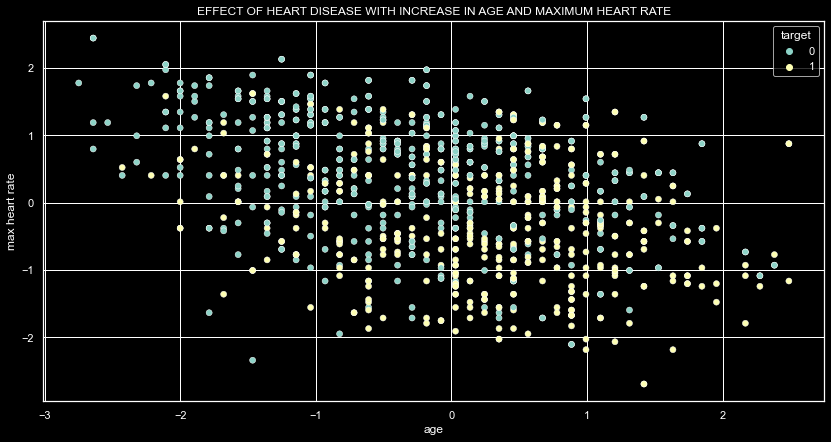

In [269]:
# #####scatterplot

# # plt.figure(figsize=(10,6))
# # sns.lineplot(x="age",y="max heart rate",hue="target",data=dataset)
# # plt.title("HEART Disease WITH INCREASE IN AGE AND MAXIMUM HEART RATE")
# # plt.show()

# plt.figure(figsize=(14,7))
# plt.xlabel("age")
# plt.ylabel("max heart rate")
# plt.title("EFFECT OF HEART DISEASE WITH INCREASE IN AGE AND MAXIMUM HEART RATE")
# sns.scatterplot(x = 'age',y = 'max heart rate', hue='target', data=dataset)

<AxesSubplot:xlabel='sex', ylabel='cholesterol'>

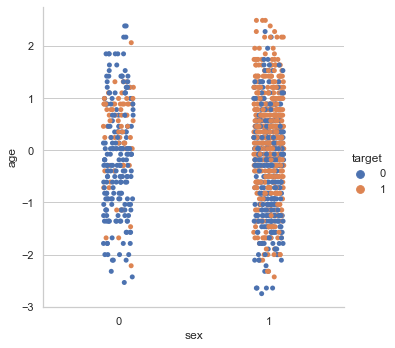

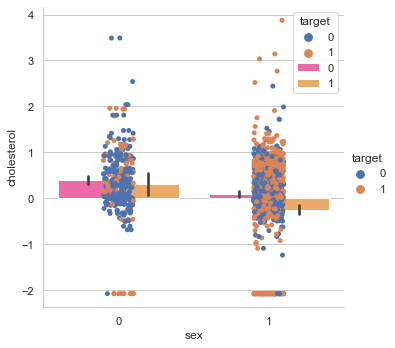

In [183]:
# sns.catplot(data=dataset, x='sex', y='age', hue='target', palette=None)
# sns.catplot(data=dataset, x='sex', y='cholesterol', hue='target', palette=None)


<AxesSubplot:xlabel='sex', ylabel='cholesterol'>

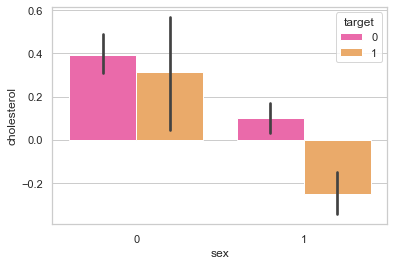

In [184]:
# sns. barplot(data=dataset, x='sex', y='cholesterol', hue='target', palette='spring')

In [226]:
# # Relation between sex, age and the target
# ggplot(dataset, aes(x = target, y = age, fill = sex, col = sex)) + geom_jitter() 
# theme_minimal()

NameError: name 'ggplot' is not defined

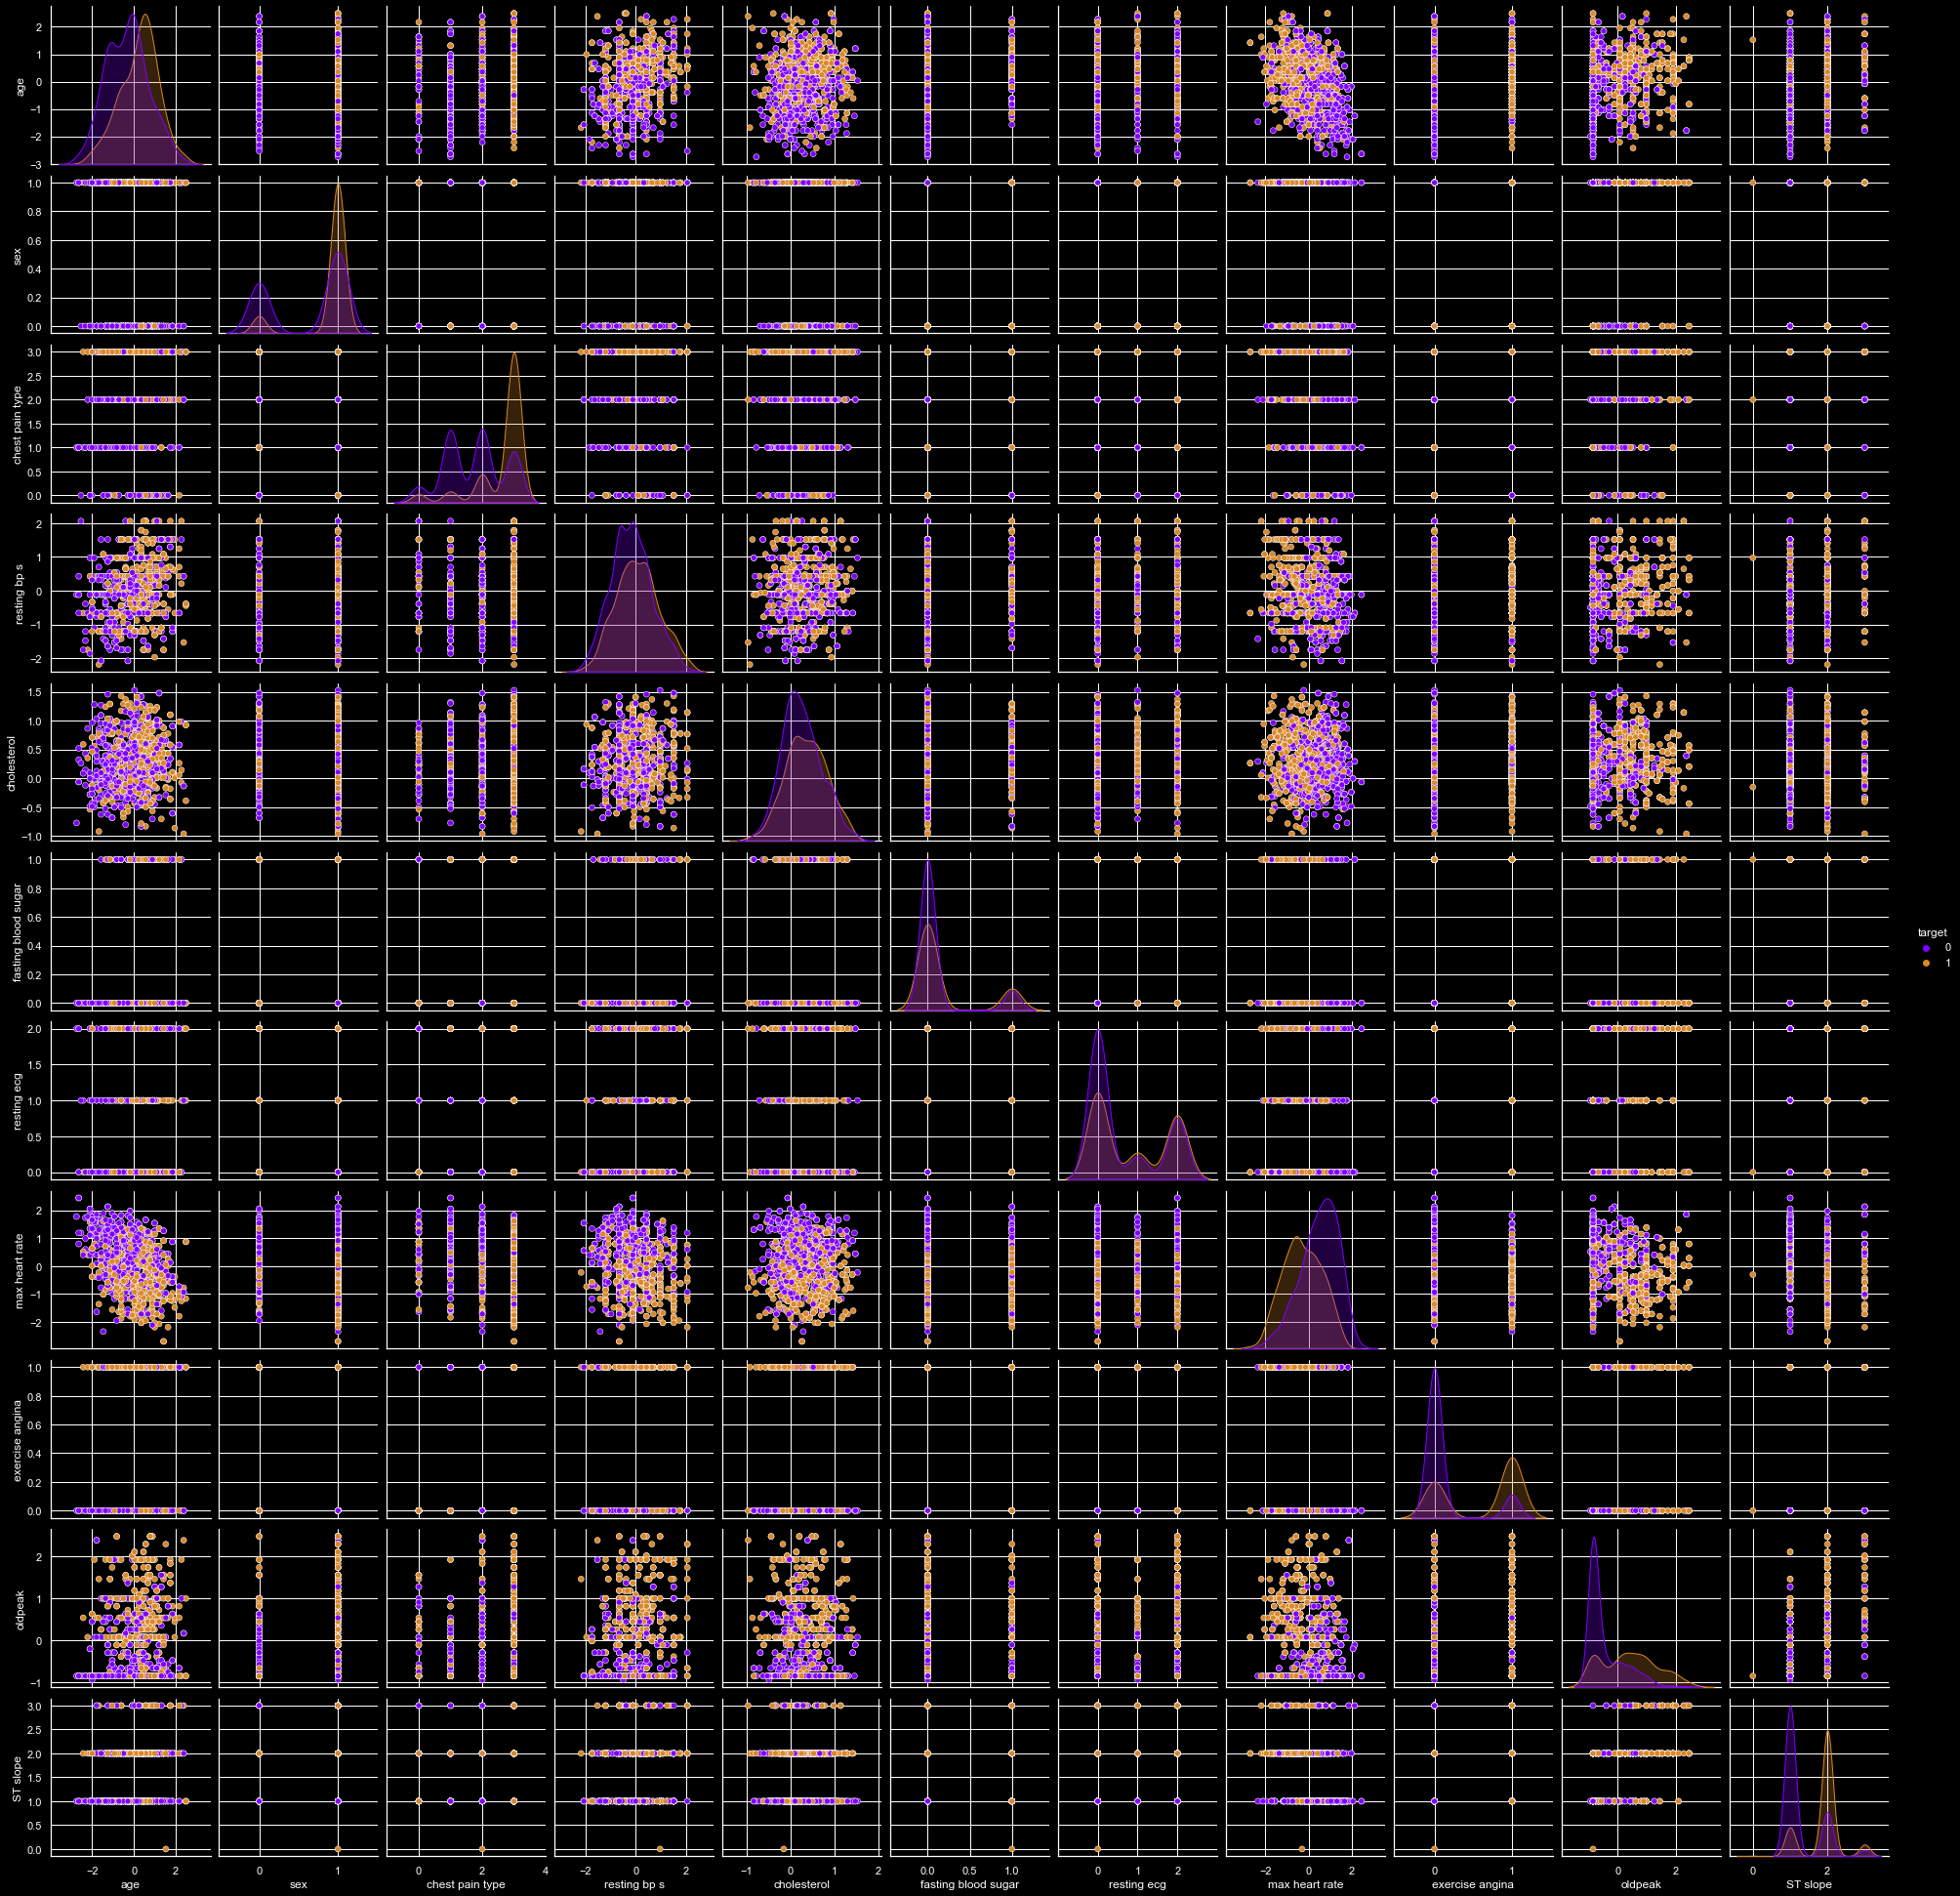

In [288]:
sns.pairplot(dataset,hue='target',palette = ["#8000ff","#da8829"])
plt.show()

#     sns.pairplot(dataset, hue = 'target', vars = ['age', 'resting bp s', 'cholesterol','max heart rate '] )


# Feature relationships for heart disease prediction

In [300]:
dataset.corr()

age       sex  chest pain type  resting bp s  \
age                  1.000000  0.026061         0.141790      0.262250   
sex                  0.026061  1.000000         0.140947      0.062749   
chest pain type      0.141790  0.140947         1.000000     -0.002287   
resting bp s         0.262250  0.062749        -0.002287      1.000000   
cholesterol          0.101460 -0.091376         0.061166      0.086231   
fasting blood sugar  0.197685  0.090101        -0.005303      0.152070   
resting ecg          0.195340  0.017967         0.087387      0.058359   
max heart rate      -0.389736 -0.142208        -0.327132     -0.114170   
exercise angina      0.200738  0.213513         0.425651      0.118516   
oldpeak              0.272330  0.153942         0.265743      0.178011   
ST slope             0.236266  0.136488         0.278140      0.112064   
target               0.284103  0.319109         0.454325      0.154889   

                     cholesterol  fasting blood sugar  resting ecg  \
age                     0.101460             0.197685     0.195340   
sex                    -0.091376             0.090101     0.017967   
chest pain type         0.061166            -0.005303     0.087387   
resting bp s            0.086231             0.152070     0.058359   
cholesterol             1.000000             0.026121     0.091711   
fasting blood sugar     0.026121             1.000000     0.100482   
resting ecg             0.091711             0.100482     1.000000   
max heart rate          0.001359            -0.081814     0.006316   
exercise angina         0.112034             0.073634     0.072237   
oldpeak                 0.045793             0.047605     0.118944   
ST slope                0.015874             0.116982     0.122468   
target                  0.110412             0.117487     0.138640   

                     max heart rate  exercise angina   oldpeak  ST slope  \
age                       -0.389736         0.200738  0.272330  0.236266   
sex                       -0.142208         0.213513  0.153942  0.136488   
chest pain type           -0.327132         0.425651  0.265743  0.278140   
resting bp s              -0.114170         0.118516  0.178011  0.112064   
cholesterol                0.001359         0.112034  0.045793  0.015874   
fasting blood sugar       -0.081814         0.073634  0.047605  0.116982   
resting ecg                0.006316         0.072237  0.118944  0.122468   
max heart rate             1.000000        -0.411134 -0.285516 -0.354424   
exercise angina           -0.411134         1.000000  0.425479  0.418991   
oldpeak                   -0.285516         0.425479  1.000000  0.588131   
ST slope                  -0.354424         0.418991  0.588131  1.000000   
target                    -0.402586         0.511273  0.472878  0.515911   

                       target  
age                  0.284103  
sex                  0.319109  
chest pain type      0.454325  
resting bp s         0.154889  
cholesterol          0.110412  
fasting blood sugar  0.117487  
resting ecg          0.138640  
max heart rate      -0.402586  
exercise angina      0.511273  
oldpeak              0.472878  
ST slope             0.515911  
target               1.000000

(12.5, -0.5)

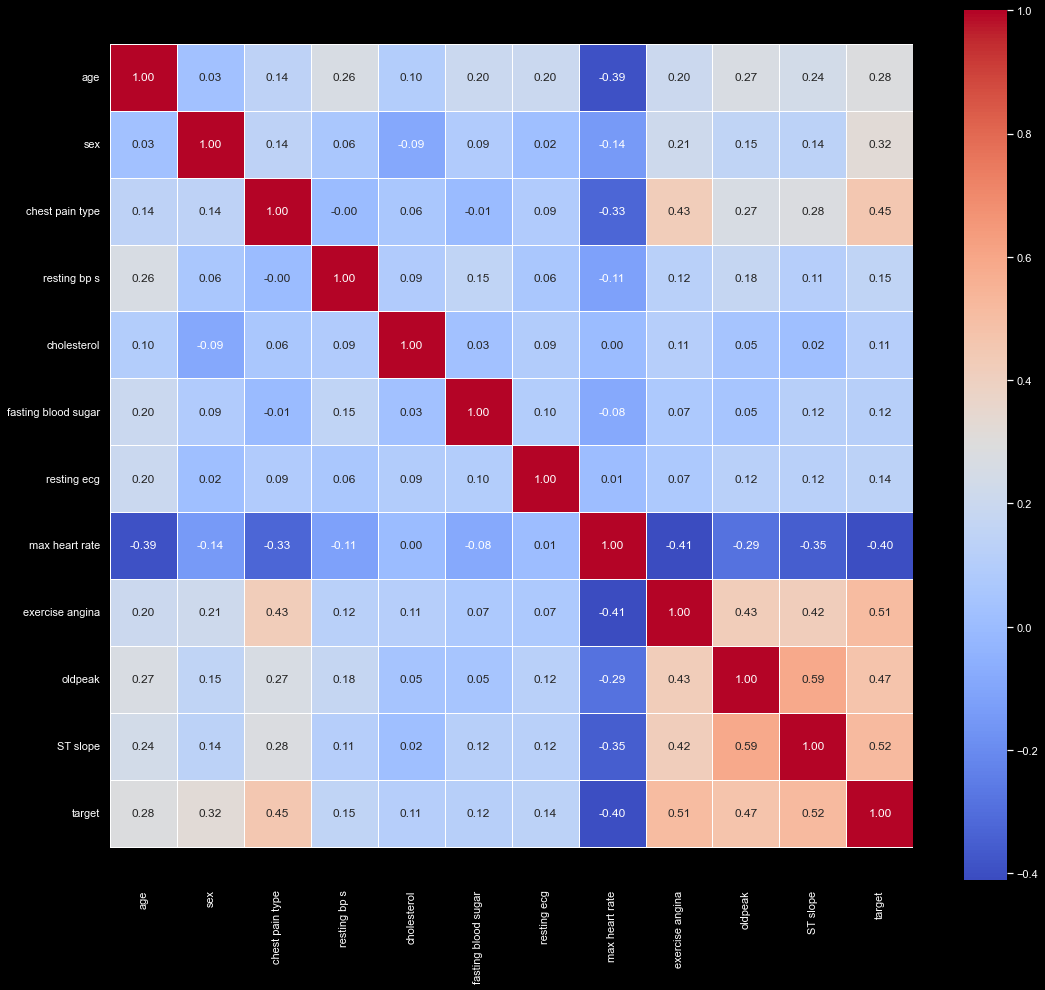

In [301]:
'------------Correlation graph-------------------'

corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(18,16))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# plt.figure(figsize=(8,6))
# sns.heatmap(dataset.corr(),cbar= True, cmap='coolwarm')


# # Correlation matrix 
# f, (ax1, ax2) = plt.subplots(1,2,figsize =(15, 8))
# corr = dataset.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# heatmapkws = dict(linewidths=0.1)
# sns.heatmap((dataset[dataset['target'] ==1]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask, **heatmapkws);
# ax1.set_title('Disease', fontsize=18)
# sns.heatmap((dataset[dataset['target'] ==0]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask,**heatmapkws);
# ax2.set_title('Healthy', fontsize=18)
# plt.show()

In [36]:
dataset.drop('target', axis=1).corrwith(dataset.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

In [222]:
"----------------Univariate selection-------------------"

# Get the features
X = dataset.iloc[:,0:13] 
y = dataset.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features
k_best = SelectKBest(score_func=chi2, k=10)
fit = k_best.fit(X,y)
# Get the feauture names
names = pd.DataFrame(X.columns)
# Save the scores
scores = pd.DataFrame(fit.scores_)
# Combine the results
results = pd.concat([names,scores],axis=1)
results.columns = ['Column','Result'] 
# Print the results
print(results.nlargest(12,'Result'))

ValueError: Input X must be non-negative.

[0.01814802 0.01418996 0.06980986 0.00908513 0.01081103 0.00127466
 0.00501933 0.03106494 0.04708716 0.04113289 0.08301988 0.66935714]


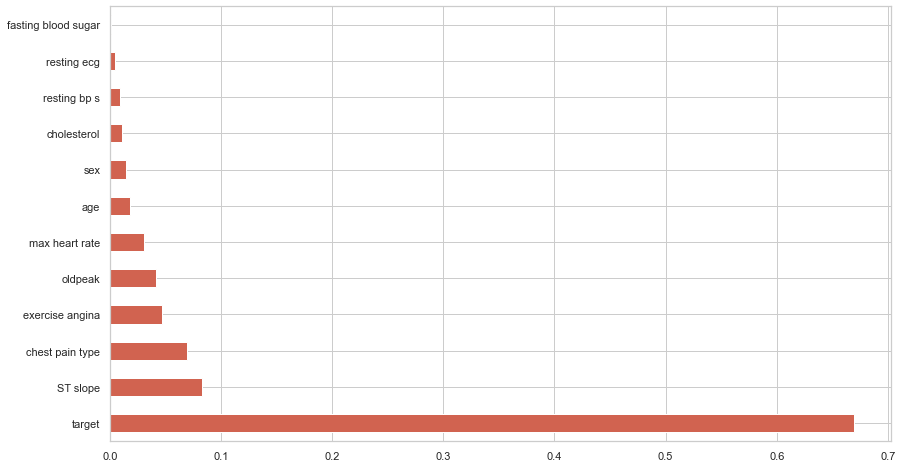

In [218]:
"------------------Feature importance------------------------"

# Use a simple randome forest model
model = RandomForestClassifier()
# Fit the RF to the data 
model.fit(X,y)
# Use the Feature importance variable to extract important features
print(model.feature_importances_) 
# Compbine the values with the orginal names
f_imp = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize = (14,8))
# Plot the values
f_imp.nlargest(13).plot(kind='barh', color="#D16350")
plt.show()

In [37]:
# ########Creating a distinction between numerical and category columns:

# col_cat = [column for column in dataset.columns if dataset[column].dtype=='object']
# col_num = dataset.drop(col_cat, axis=1).columns

#####Separating the categorical and numerical columns
cat_data = []
num_data = []
cols = dataset.columns
for j in cols:
    if dataset[j].nunique() <=10:
        cat_data.append(j)
    else:
        num_data.append(j)

In [38]:
####categorical features
cat_data

['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope',
 'target']

In [39]:
have_disease = dataset.loc[dataset['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = dataset.loc[dataset['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [40]:
have_disease = dataset.loc[dataset['target']==1, 'chest pain type'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = dataset.loc[dataset['target']==0, 'chest pain type'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Chest_pain_type.I  :Bars   [index]   (chest pain type)
   .Bars.Chest_pain_type.II :Bars   [index]   (chest pain type)

In [41]:
have_disease = dataset.loc[dataset['target']==1, 'fasting blood sugar'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = dataset.loc[dataset['target']==0, 'fasting blood sugar'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fasting_blood_sugar.I  :Bars   [index]   (fasting blood sugar)
   .Bars.Fasting_blood_sugar.II :Bars   [index]   (fasting blood sugar)

In [195]:
have_disease = dataset.loc[dataset['target']==1, 'resting ecg'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = dataset.loc[dataset['target']==0, 'resting ecg'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by resting ecg", xlabel='resting ecg', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

# sns.countplot(x='resting bp s', hue= 'target', data = dataset, palette= 'rocket')

:Overlay
   .Bars.Resting_ecg.I  :Bars   [index]   (resting ecg)
   .Bars.Resting_ecg.II :Bars   [index]   (resting ecg)

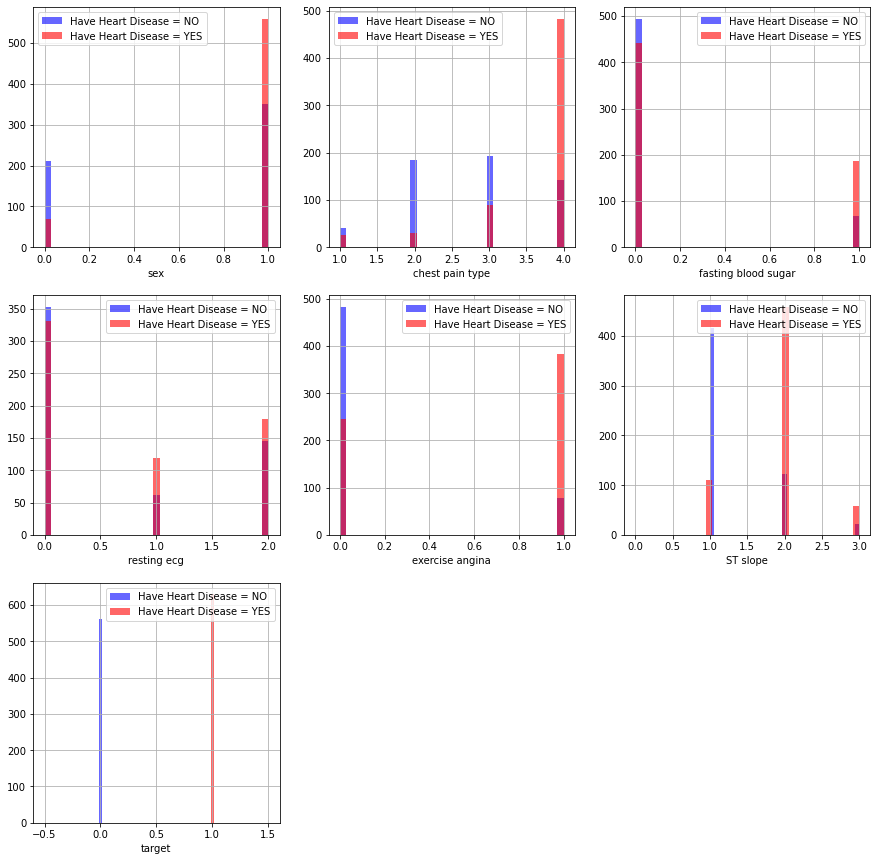

In [43]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cat_data, 1):
    plt.subplot(3, 3, i)
    dataset[dataset["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [44]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(dataset.age[dataset.target==1],
            dataset.max heart rate[data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(dataset.age[dataset.target==0],
            dataset.max heart rate[dataset.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease", "No Disease"]);

SyntaxError: invalid syntax (Temp/ipykernel_7816/3287948799.py, line 6)

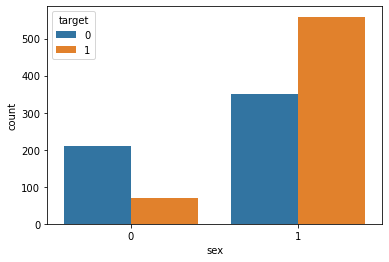

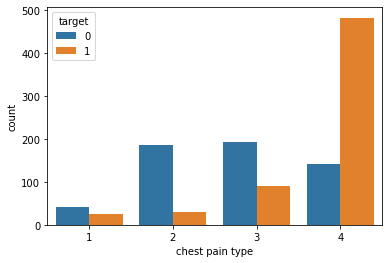

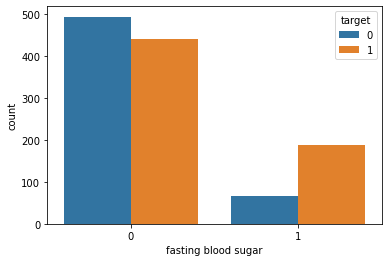

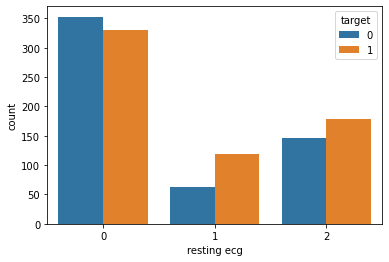

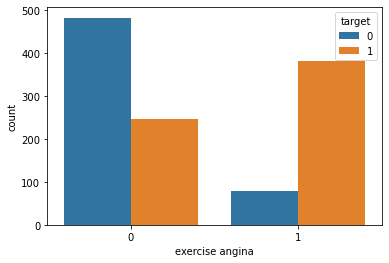

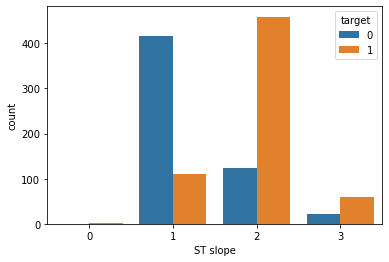

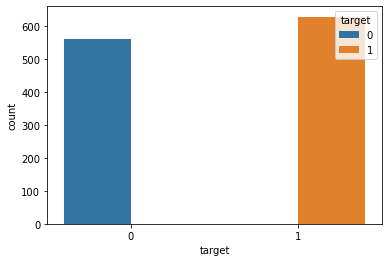

In [45]:
#########Using a count plot to represent category characteristics:
warnings.filterwarnings('ignore')
for column in cat_data:
    sns.countplot(dataset[column], hue=dataset['target'])
    plt.show()

In [46]:
num_data

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

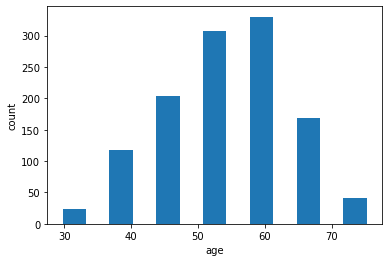

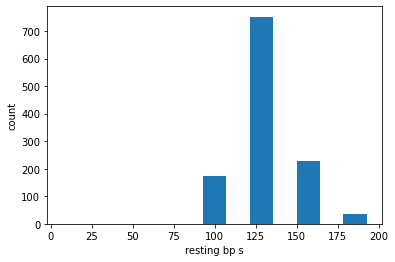

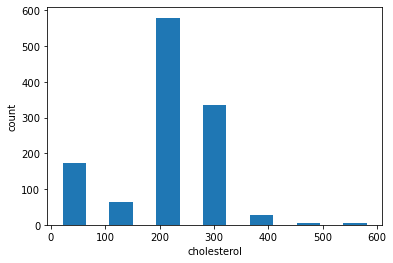

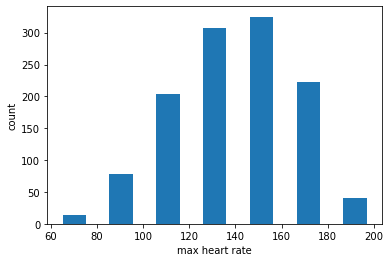

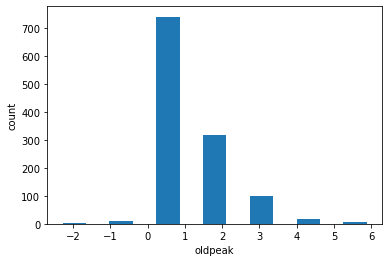

In [47]:
#########For numerical features, histogram plotting:
for column in num_data:
    plt.hist(dataset[column], bins=7, rwidth=0.5)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()
        

# Outliers

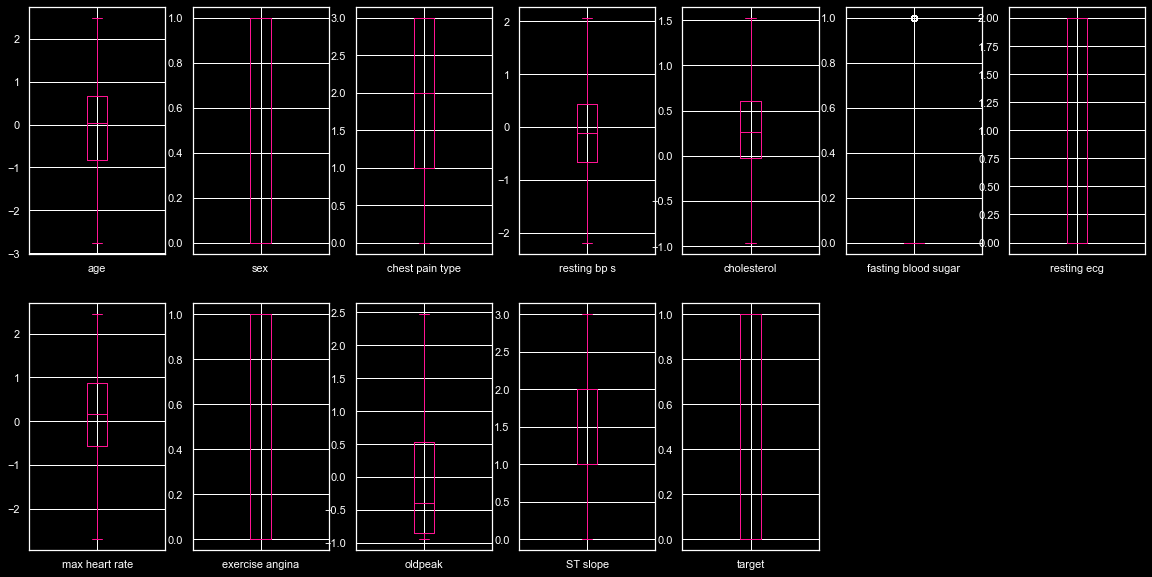

In [244]:
"----------------------Checking the outliers--------------------------"

# for column in num_data:
#     sns.boxplot(dataset[column])
#     plt.show()
        
    
dataset.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [240]:
# define continuous variable & plot
continous_features = ['age','resting bp s','cholesterol','max heart rate','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            dataset.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(dataset[continous_features])

For the feature age, No of Outliers is 0
For the feature resting bp s, No of Outliers is 0
For the feature cholesterol, No of Outliers is 1
For the feature max heart rate, No of Outliers is 0
For the feature oldpeak, No of Outliers is 0


In [241]:
"-----------removing outliers-----------------------"

outliers(dataset[continous_features], drop=True)

Outliers from age feature removed
Outliers from resting bp s feature removed
Outliers from cholesterol feature removed
Outliers from max heart rate feature removed
Outliers from oldpeak feature removed


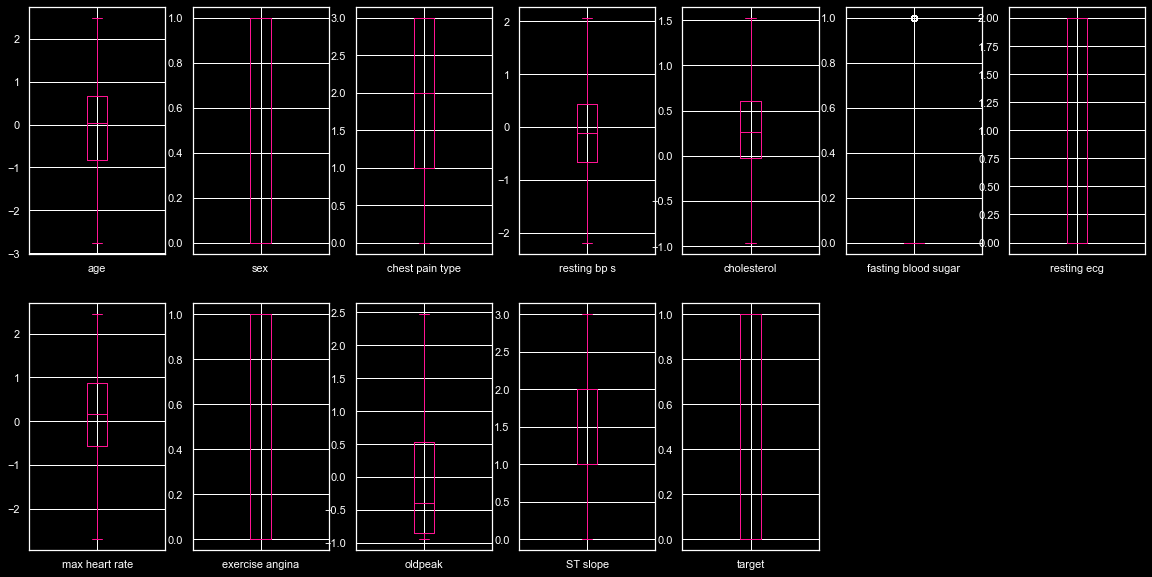

In [242]:
dataset.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

# Label Encoding

In [52]:

#---------------------------------------------Label encoder------------------------------------------#

for column in cat_data:
    le = LabelEncoder()
    dataset[column]=le.fit_transform(dataset[column])
    

In [59]:
cat_data.remove('target')
dataset = pd.get_dummies(data, columns = cat_data)

ValueError: list.remove(x): x not in list

In [60]:
dataset.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                1           140          289                    0   
1   49    0                2           160          180                    0   
2   37    1                1           130          283                    0   
3   48    0                3           138          214                    0   
4   54    1                2           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [108]:
# print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


# Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [110]:
dataset.head()

age  sex  chest pain type  resting bp s  cholesterol  \
0 -1.466728    1                1      0.427328     0.775674   
1 -0.504600    0                2      1.516587    -0.299512   
2 -1.787437    1                1     -0.117301     0.716489   
3 -0.611503    0                3      0.318402     0.035867   
4  0.029915    1                2      0.971958    -0.151550   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                    0            0        1.265039                0   
1                    0            0        0.637758                0   
2                    0            1       -1.636136                0   
3                    0            0       -1.244085                1   
4                    0            0       -0.695214                0   

    oldpeak  ST slope  target  
0 -0.849792         1       0  
1  0.071119         2       1  
2 -0.849792         1       0  
3  0.531575         2       1  
4 -0.849792         1       0

# Splitting data

In [111]:
######Train test split:

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target',axis=1),
                                                    dataset['target'], test_size=0.2,
                                                    stratify=dataset['target'])

# Modelling###########

In [113]:
####Logistic regression
model_lr=LogisticRegression(solver='liblinear')
model_lr.fit(X_train,y_train)
ypred_lr=model_lr.predict(X_test)
confusion_matrix(y_test, ypred_lr)

array([[ 95,  17],
       [ 23, 103]], dtype=int64)

Text(33.0, 0.5, 'Actual')

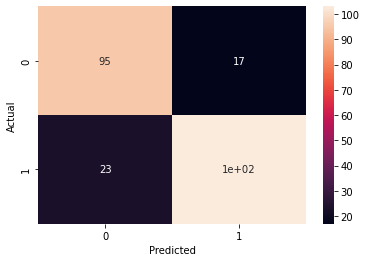

In [114]:
######confusion matirx of logistic regression predicted and actual visualisation
sns.heatmap(confusion_matrix(y_test,ypred_lr),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [115]:
#####Decision tree classifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
ypred_dt=model_dt.predict(X_test)
confusion_matrix(y_test, ypred_lr)

array([[ 95,  17],
       [ 23, 103]], dtype=int64)

Text(33.0, 0.5, 'Actual')

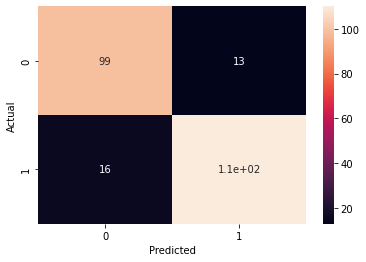

In [116]:
##########confusion matirx of Decision tree classifier predicted and actual visualisation

sns.heatmap(confusion_matrix(y_test,ypred_dt),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [117]:
####Random forest classifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
ypred_rf=model_rf.predict(X_test)
confusion_matrix(y_test, ypred_rf)

array([[103,   9],
       [ 11, 115]], dtype=int64)

Text(33.0, 0.5, 'Actual')

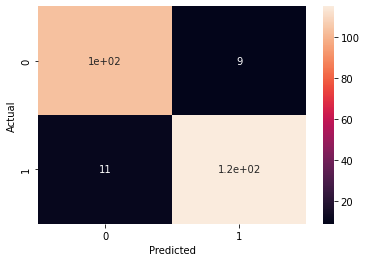

In [118]:
######confusion matirx of Random forest classifier predicted and actual visualisation

sns.heatmap(confusion_matrix(y_test,ypred_rf),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [119]:
####SV classifier
model_svc=svc()
model_svc.fit(X_train,y_train)
ypred_svc=model_svc.predict(X_test)
confusion_matrix(y_test, ypred_svc)

NameError: name 'svc' is not defined

In [120]:
######confusion matirx of SV classifier predicted and actual visualisation

sns.heatmap(confusion_matrix(y_test,ypred_svc),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

NameError: name 'ypred_svc' is not defined

In [121]:
####KNeighbor classifier
model_KNN=KNeighborsClassifier()
model_KNN.fit(X_train,y_train)
ypred_KNN=model_KNN.predict(X_test)
confusion_matrix(y_test, ypred_KNN)

array([[ 93,  19],
       [ 23, 103]], dtype=int64)

Text(33.0, 0.5, 'Actual')

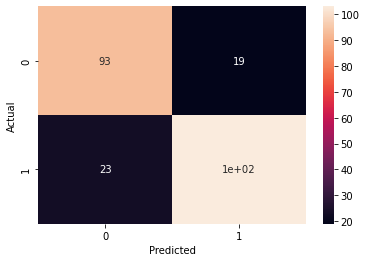

In [122]:
######confusion matirx of KNeighbor classifier predicted and actual visualisation

sns.heatmap(confusion_matrix(y_test,ypred_KNN),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [123]:
#####Multinomial NB
model_nb=MultinomialNB()
model_nb.fit(X_train,y_train)
ypred_nb=model_nb.predict(X_test)
confusion_matrix(y_test, ypred_nb)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [124]:
######confusion matirx of Multinomial NB predicted and actual visualisation

sns.heatmap(confusion_matrix(y_test,ypred_nb),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

NameError: name 'ypred_nb' is not defined

In [79]:
####Evaluation######

##########Classification############

In [80]:
print(classification_report(y_test,ypred_lr))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       112
           1       0.81      0.79      0.80       126

    accuracy                           0.79       238
   macro avg       0.79      0.79      0.79       238
weighted avg       0.79      0.79      0.79       238



In [81]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       112
           1       0.87      0.79      0.82       126

    accuracy                           0.82       238
   macro avg       0.83      0.83      0.82       238
weighted avg       0.83      0.82      0.82       238



In [82]:
print(classification_report(y_test,ypred_nb))

NameError: name 'ypred_nb' is not defined

In [83]:
####Models building
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [84]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.812652    0.827014  0.819928    0.819833      0.819997
recall       0.820639    0.819249  0.819928    0.819944      0.819928
f1-score     0.816626    0.823113  0.819928    0.819870      0.819944
support    407.000000  426.000000  0.819928  833.000000    833.000000
_______________________________________________
Confusion Matrix: 
 [[334  73]
 [ 77 349]]

Test Result:
Accuracy Score: 85.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.835526    0.868293  0.854342    0.851909      0.854158
recall       0.824675    0.876847  0.854342    0.850761      0.854342
f1-score     0.830065    0.872549  0.854342    0.851307      0.854223
support    154.000000  203.000000  0.854342  357.000000    357.

In [86]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            81.992797           85.434174

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.20%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.889435    0.894366  0.891957    0.891901      0.891957
recall       0.889435    0.894366  0.891957    0.891901      0.891957
f1-score     0.889435    0.894366  0.891957    0.891901      0.891957
support    407.000000  426.000000  0.891957  833.000000    833.000000
_______________________________________________
Confusion Matrix: 
 [[362  45]
 [ 45 381]]

Test Result:
Accuracy Score: 83.47%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.823129    0.842857  0.834734    0.832993      0.834347
recall       0.785714    0.871921  0.834734    0.828818      0.834734
f1-score     0.803987    0.857143  0.834734    0.830565      0.834213
support    154.000000  203.000000  0.834734  357.000000    357.

In [88]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            81.992797           85.434174
1  K-nearest neighbors            89.195678           83.473389

In [89]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.60%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.876812    0.894988  0.885954    0.885900      0.886107
recall       0.891892    0.880282  0.885954    0.886087      0.885954
f1-score     0.884287    0.887574  0.885954    0.885931      0.885968
support    407.000000  426.000000  0.885954  833.000000    833.000000
_______________________________________________
Confusion Matrix: 
 [[363  44]
 [ 51 375]]

Test Result:
Accuracy Score: 86.27%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.862069    0.863208  0.862745    0.862638      0.862716
recall       0.811688    0.901478  0.862745    0.856583      0.862745
f1-score     0.836120    0.881928  0.862745    0.859024      0.862168
support    154.000000  203.000000  0.862745  357.000000    357.

In [90]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0     Logistic Regression            81.992797           85.434174
1     K-nearest neighbors            89.195678           83.473389
2  Support Vector Machine            88.595438           86.274510

In [91]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    407.0  426.0       1.0      833.0         833.0
_______________________________________________
Confusion Matrix: 
 [[407   0]
 [  0 426]]

Test Result:
Accuracy Score: 87.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.821429    0.915344  0.871148    0.868386      0.874831
recall       0.896104    0.852217  0.871148    0.874160      0.871148
f1-score     0.857143    0.882653  0.871148    0.869898      0.871649
support    154.000000  203.000000  0.871148  357.000000    357.000000
_______________________________________________

In [92]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression            81.992797           85.434174
1       K-nearest neighbors            89.195678           83.473389
2    Support Vector Machine            88.595438           86.274510
3  Decision Tree Classifier           100.000000           87.114846

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    407.0  426.0       1.0      833.0         833.0
_______________________________________________
Confusion Matrix: 
 [[407   0]
 [  0 426]]

Test Result:
Accuracy Score: 93.28%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.922078    0.940887  0.932773    0.931482      0.932773
recall       0.922078    0.940887  0.932773    0.931482      0.932773
f1-score     0.922078    0.940887  0.932773    0.931482      0.932773
support    154.000000  203.000000  0.932773  357.000000    357.000000
_______________________________________________

In [94]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression            81.992797           85.434174
1       K-nearest neighbors            89.195678           83.473389
2    Support Vector Machine            88.595438           86.274510
3  Decision Tree Classifier           100.000000           87.114846
4  Random Forest Classifier           100.000000           93.277311

In [95]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

In [ ]:
#####Models Hyperparameter Tuning

In [ ]:
######1. Logistic Regression Hyperparameter Tuning¶

from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

In [ ]:
#########2. K-nearest neighbors Hyperparameter Tuning¶

train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

In [96]:
#####3. Support Vector Machine Hyperparameter Tuning¶

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)


NameError: name 'GridSearchCV' is not defined

In [97]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [98]:
######4. Decision Tree Classifier Hyperparameter Tuning

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

NameError: name 'GridSearchCV' is not defined

In [99]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [100]:
#######5. Random Forest Classifier Hyperparameter Tuning

n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

NameError: name 'GridSearchCV' is not defined

In [101]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [102]:
######6. XGBoost Classifier Hyperparameter Tuning¶

param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=50, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

NameError: name 'stats' is not defined

In [103]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

NameError: name 'xgb_clf' is not defined

In [104]:
results_df


Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression            81.992797           85.434174
1       K-nearest neighbors            89.195678           83.473389
2    Support Vector Machine            88.595438           86.274510
3  Decision Tree Classifier           100.000000           87.114846
4  Random Forest Classifier           100.000000           93.277311

In [105]:
######6. Features Importance According to Random Forest and XGBoost¶
    
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [106]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [107]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)

NameError: name 'xgb_clf' is not defined